In [4]:
from huggingface_hub import notebook_login

notebook_login()

In [5]:
from transformers import Gemma3ForConditionalGeneration, AutoProcessor
from IPython.display import display, Markdown

model = Gemma3ForConditionalGeneration.from_pretrained(
    "google/gemma-3-12b-it", dtype="auto", device_map="auto"
)

processor = AutoProcessor.from_pretrained("google/gemma-3-12b-it")

Loading checkpoint shards: 100%|██████████| 5/5 [05:56<00:00, 71.37s/it]
'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 3cb21d1e-0253-48fe-91f9-d311e9a125e1)')' thrown while requesting HEAD https://huggingface.co/google/gemma-3-12b-it/resolve/main/generation_config.json
Retrying in 1s [Retry 1/5].
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [6]:
def generate_description(prompt_text, image_path, max_new_tokens):

    messages = [
        {
            "role": "system",
            "content": [
                {"type": "text", "text": "You are a helpful assistant."}
            ]
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": image_path,
                },
                {"type": "text", "text": prompt_text},
            ],
        }
    ]

    inputs = processor.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_dict=True,
        return_tensors="pt"
    )
    inputs = inputs.to(model.device)

    generated_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids_trimmed = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    
    return output_text[0] if output_text else ""

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Table scene

In [8]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item on the table.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's an object detection analysis of the image, with as much detail as possible:

1.  **Calendar**
    *   **Type/Class:** Wall calendar
    *   **Primary Color:** Purple, White
    *   **Size Estimate:** Large
    *   **Position:** Hung on the wall behind the desk, taking up a significant portion of the background.
2.  **Desk Lamp**
    *   **Type/Class:** Desk lamp
    *   **Primary Color:** White
    *   **Size Estimate:** Medium
    *   **Position:** Left side of the desk, close to the wall, slightly angled towards the center.
3.  **Electrical Outlet:**
    *   **Type/Class:** Electrical outlet
    *   **Primary Color:** White
    *   **Size Estimate:** Small
    *   **Position:** Near the desk lamp, on the wall.
4.  **Fan**
    *   **Type/Class:** Electric fan
    *   **Primary Color:** White, Black
    *   **Size Estimate:** Medium
    *   **Position:** Right side of the desk.
5.  **Water Bottle**
    *   **Type/Class:** Metal water bottle
    *   **Primary Color:** Silver
    *   **Size Estimate:** Medium
    *   **Position:** Right side of the desk, next to the fan.
6.  **USB Charging Block**
    *   **Type/Class:** USB Power adapter
    *   **Primary Color:** White
    *   **Size Estimate:** Small
    *   **Position:** Right side of the desk, near the water bottle
7.  **Notebook (Collegeblock)**
    *   **Type/Class:** Spiral notebook
    *   **Primary Color:** Blue, White
    *   **Size Estimate:** Medium
    *   **Position:** Center-left of the desk.
8.  **Cable/Cord**
    *   **Type/Class:** Electrical cord
    *   **Primary Color:** Black
    *   **Size Estimate:** Medium
    *   **Position:** Running from the notebook towards the left side, across the desk.
9.  **Mouse**
    *   **Type/Class:** Computer mouse
    *   **Primary Color:** Black
    *   **Size Estimate:** Small
    *   **Position:** In front of the notebook, near the center of the desk.
10. **Pen**
    *   **Type/Class:** Writing pen
    *   **Primary Color:** Blue
    *   **Size Estimate:** Small
    *   **Position:** Right of the notebook, next to the mouse.
11. **USB Drive**
    *   **Type/Class:** USB flash drive
    *   **Primary Color:** Black
    *   **Size Estimate:** Very small
    *   **Position:** Front left on the desk, near the desk lamp.
12. **Keychains**
    *   **Type/Class:** Keychains
    *   **Primary Color:** Gold, Yellow
    *   **Size Estimate:** Small
    *   **Position:** Near the left side, on the desk, behind the USB drive.
13. **Paper/Document**
    *   **Type/Class:** Sheet of paper
    *   **Primary Color:** Multi-colored
    *   **Size Estimate:** Medium
    *   **Position:** Center of the desk.
14. **Earbuds**
    *   **Type/Class:** Earbuds
    *   **Primary Color:** White, Black
    *   **Size Estimate:** Small
    *   **Position:** Near the desk lamp.



I've done my best to describe all the visible items. Let me know if you’d like me to focus on a specific area or detail!

In [9]:
prompt_text = """
    You are an assistant analyzing a photo of a tabletop. Your task is to list every visible object **on the table surface only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:
    - [Object name], [main color], [size: small/medium/large], [position: left / center / right part of the table]

    Rules:
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.
    3. Include very small items (e.g. pen, key, coin) if visible.
    4. If an object is partially hidden but identifiable, include it.
    5. Do not describe position relative to other objects (e.g. "next to cup") — use absolute position on table (left/center/right).
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a list of the visible objects on the table surface, following your instructions:

- Calendar, purple, large, center
- Desk lamp, white, medium, left
- Electric fan, white, large, right
- Water bottle, silver, medium, right
- Notebook, blue, medium, left
- Pen, blue, small, center
- Computer mouse, gray, small, center
- USB stick, black, small, left
- Key, gold, small, left
- Small figurine, gold, small, left
- Phone, black, small, center
- White object, white, small, center
- Card, blue, small, center

In [10]:
prompt_text = """
    You are analyzing an image of a table with various personal items placed on it. Based on the provided description, the following objects should be present in the scene:

    Cup
    Notebook
    Pen
    Calculator
    Thermos
    Mouse
    Calendar
    Lamp
    Clock
    Two markers (green and pink)
    Power bank / charging block
    Knife
    Fan

Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Okay, let's analyze the image and identify the present and missing items based on your provided list.

**Present Objects (Visible in the image):**

*   **Notebook:** There's a notebook titled "Collegeblock" visible on the left side of the table.
*   **Pen:** A pen is on the table near the notebook.
*   **Calculator:** A small calculator is present on the table among other items.
*   **Thermos:** A silver thermos is on the right side of the table.
*   **Mouse:** A computer mouse is on the table near some papers.
*   **Calendar:** A calendar for 2023 is hanging on the wall behind the table.
*   **Lamp:** A desk lamp is located on the left side of the table.
*   **Two markers:** Green and pink markers are visible next to the lamp.
*   **Power bank / charging block:** A white charging block is on the table.
*   **Fan:** An electric fan is placed on the table in the background.
*   **Knife:** A small knife or cutter is located next to the markers.

**Missing Objects (Not visible in the image):**

*   **Cup:** There is no cup visible in the image.
*   **Clock:** No clock is visible.



Let me know if you would like me to do anything else with this image!

In [11]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. Is there a container, used for storing drinks? (If yes name it — if not, write “No”)  
    2. Is there a phone on the table? (Answer: Yes / No)  
    3. Is there a device for a laptop on the table? (Answer: Yes / No)  
    4. What black items are visible on the table? (List them — if none, write “None”)  
    5. Is there a writing instrument on the table? (If yes name it — if not, write “No”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a breakdown of the answers based solely on the image:

1.  **Is there a container, used for storing drinks?** Yes, a water bottle.
2.  **Is there a phone on the table?** Yes
3.  **Is there a device for a laptop on the table?** No
4.  **What black items are visible on the table?** Mouse, pen, cables.
5.  **Is there a writing instrument on the table?** Yes, a pen.

## Bed scene

In [12]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item on the bed.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.

"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Okay, here's an object detection breakdown of the items on the bed in the image, based on my analysis:

**1. Laptop**
*   **Object Type/Class:** Laptop Computer
*   **Primary Color:** Black
*   **Size Estimate:** Medium
*   **Position:** Center of the bed, slightly towards the right side. Partially covered by the blanket.

**2. Blanket/Comforter**
*   **Object Type/Class:** Bed Covering
*   **Primary Color:** Pink/Peach with Green Heart Pattern
*   **Size Estimate:** Large
*   **Position:** Covers a majority of the bed, overlapping the laptop.

**3. Pillow (Left)**
*   **Object Type/Class:** Pillow
*   **Primary Color:** Teal with White Pattern
*   **Size Estimate:** Medium
*   **Position:** Left side of the bed, against the headboard.

**4. Pillow (Right)**
*   **Object Type/Class:** Pillow
*   **Primary Color:** White
*   **Size Estimate:** Medium
*   **Position:** Right side of the bed, against the headboard, adjacent to the teal pillow.

**5. Fitted Sheet**
*   **Object Type/Class:** Bed Sheet
*   **Primary Color:** Blue with White Pattern
*   **Size Estimate:** Large
*   **Position:**  Covers the entire mattress, beneath the blanket and pillows.

**6. Small Object (likely a device or accessory)**
*   **Object Type/Class:** Unknown (possibly a phone, a flash drive, or a small accessory).
*   **Primary Color:** White
*   **Size Estimate:** Small
*   **Position:**  On top of the blanket, near the laptop, slightly towards the left side.

In [13]:
prompt_text = """
    You are an assistant analyzing a photo of a bed. Your task is to list every visible object **on the bed surface only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:  
    - [Object name], [main color], [size: small/medium/large], [position: left / center / right part of the bed]

    Rules:  
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.  
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.  
    3. Include very small items (e.g. plug, cable, coin) if visible.  
    4. If an object is partially hidden but identifiable, include it.  
    5. Do not describe position relative to other objects (e.g. "next to lamp") — use absolute position on table (left/center/right).

"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a breakdown of the visible objects on the bed surface:

- Pillow, white, medium, left part of the bed
- Pillow, teal, medium, center part of the bed
- Blanket, pink, large, center part of the bed
- Laptop, black, medium, center part of the bed
- Plug, white, small, left part of the bed

In [14]:
prompt_text = """
    You are analyzing an image of a bed with various personal items placed on it. Based on the provided description, the following objects should be present in the scene:

    Bottle
    Laptop
    Earbuds / AirPods case
    Phone
    Two pillows
    Blanket


Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Okay, let's analyze the image and identify the objects present.

Here's what I can see in the image:

*   **Laptop:** Yes, a laptop is clearly visible on the bed.
*   **Two pillows:** Yes, there are two pillows on the bed, one with a teal cover and one white.
*   **Blanket:** Yes, a pink blanket with green leaf patterns is on the bed.
*   **Earbuds / AirPods case:** Yes, a small white case (likely for earbuds or AirPods) is visible on the bed near the laptop.

**Missing/Not Visible:**

*   **Bottle:** I don't see a bottle anywhere in the image.
*   **Phone:** I cannot see a phone in the image.



Let me know if you want me to analyze another image!

In [15]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. Is there a device on the bed that can be used to watch a movie? (If yes, name it — if not, write “No”)  
    2. Are there headphones on the bed? (Answer: Yes / No)  
    3. What green items are visible on the bed? (List them — if none, write “None”)  
    4. Is there an object in the image that can emit light? (If yes, name it — if not, write “No”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here are the answers to your questions, based only on what's visible in the image:

1.  Yes, a laptop.
2.  Yes.
3.  Pillow and bedspread.
4.  Lamp.

## Wardrobe scene

In [16]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item in the wardrobe.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.

"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a detailed breakdown of the objects detected in the image, based on your instructions:

**1. Wardrobe/Closet**

*   **Object type/class:** Structure/Furniture
*   **Primary color:** Light yellow/beige
*   **Size estimate:** Large (full wardrobe)
*   **Position relative to other objects:** Encloses all other items.

**2. Hanger (x3)**

*   **Object type/class:** Clothing accessory
*   **Primary color:** Light brown/Pink
*   **Size estimate:** Small
*   **Position relative to other objects:** Located on the hanging rod, supporting clothing items. One is on the left side, one is in the center, and one is on the right side.

**3. Jacket (Black Padded)**

*   **Object type/class:** Outerwear
*   **Primary color:** Black
*   **Size estimate:** Medium/Large
*   **Position relative to other objects:** Hanging on the right side of the hanging rod, overlapping with the plaid shirt.

**4. Plaid Shirt**

*   **Object type/class:** Shirt
*   **Primary color:** Red, black, white (plaid pattern)
*   **Size estimate:** Medium
*   **Position relative to other objects:** Hanging on the hanging rod, partially obscured by the black jacket. It is centrally located.

**5. Shirt (Grey)**

*   **Object type/class:** Shirt
*   **Primary color:** Grey
*   **Size estimate:** Medium
*   **Position relative to other objects:** Hanging on the left side of the hanging rod, partially obscured by the black jacket.

**6. Pants (Dark Blue)**

*   **Object type/class:** Bottoms
*   **Primary color:** Dark Blue
*   **Size estimate:** Medium
*   **Position relative to other objects:** Folded on the shelf below the hanging rod, partially obscured by the blue bin.

**7. Blue Storage Bin**

*   **Object type/class:** Storage Container
*   **Primary color:** Blue
*   **Size estimate:** Medium
*   **Position relative to other objects:** Located on the shelf below the hanging rod, in front of the pants.

**8. Round Item (Inside Blue Bin)**

*   **Object type/class:** Unknown (possible accessories, decor)
*   **Primary color:** Silver/Grey
*   **Size estimate:** Small
*   **Position relative to other objects:** Partially visible inside the blue bin.

**9. Hanging Rod**

*   **Object type/class:** Hardware/Fixture
*   **Primary color:** Silver
*   **Size estimate:** Medium
*   **Position relative to other objects:** Runs horizontally across the top of the wardrobe.

In [17]:
prompt_text = """
    You are an assistant analyzing a photo of a wardrobe. Your task is to list every visible object **inside a wardrobe only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:  
    - [Object name], [main color], [size: small/medium/large]

    Rules:  
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.  
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.  
    3. Include very small items (e.g. plug, cable, coin) if visible.  
    4. If an object is partially hidden but identifiable, include it.  

"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a list of the visible objects inside the wardrobe, based on the provided image:

- Jacket, black, large
- Shirt, red and black, medium
- Hangers, silver, small
- Pants, blue, large
- Box, blue, medium
- Tray, white, small

In [18]:
prompt_text = """
    You are analyzing an image of a wardrobe with various personal items placed in it. Based on the provided description, the following objects should be present in the scene:
  
    Jacket
    Scotch
    Hat
    Shirt
    Shoes
    Pants
    Hangers
    Socks
    Storage box
    Plate
    Fork

Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Okay, let's analyze the image based on your provided list of potential objects.

**Present in the Image:**

*   **Jacket:** A dark quilted jacket is hanging on a hanger.
*   **Shirt:** A plaid shirt is visible, also hanging on a hanger.
*   **Pants:** A pair of dark pants is partially visible at the bottom.
*   **Hangers:** Several hangers are present on the hanging rod.
*   **Storage box:** A blue storage box is visible on the shelf.
*   **Plate:** A plate is partially visible inside the storage box. 

**Missing or Not Visible in the Image:**

*   **Scotch:** No scotch is visible.
*   **Hat:** No hat is visible.
*   **Shoes:** No shoes are visible.
*   **Socks:** No socks are visible.
*   **Fork:** No fork is visible.



Let me know if you'd like me to analyze anything else in the image!

In [19]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. How many hangers are visible inside the wardrobe? (If none, write “0”)  
    2. Are there any items inside a storage bin? (Answer: Yes / No)  
    3. Is there any item with a plaid pattern? (Answer: Yes / No)  
    4. What black items are visible on the picture? (List them — if none, write “None”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a breakdown of the answers based solely on the image:

1.  **How many hangers are visible inside the wardrobe?** 4
2.  **Are there any items inside a storage bin?** Yes
3.  **Is there any item with a plaid pattern?** Yes
4.  **What black items are visible on the picture?** A jacket and trousers

## Additional experiments

Parsed points:  [[0.15, 0.12], [0.75, 0.13], [0.22, 0.67], [0.07, 0.75], [0.33, 0.74], [0.48, 0.75], [0.56, 0.75], [0.62, 0.77], [0.76, 0.77], [0.42, 0.48], [0.58, 0.47], [0.68, 0.45], [0.23, 0.87], [0.28, 0.87]]
Parsed descriptions:  ['2023 calendar', 'electric fan', 'white desk lamp', 'black cable', 'notebook', 'blue pen', 'black pen', 'computer mouse', 'stainless steel water bottle', 'smartphone', 'small metal bracket', 'stack of papers', 'small silver charm', 'small gold charm']


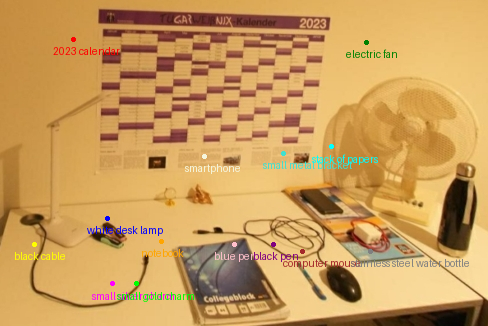

In [20]:
from utils import plot_points

prompt_text = """
    You are analyzing an image of a table with various objects.

    TASK: Locate every object that lies on the table surface, identify what each object is, and output point coordinates with descriptive labels in JSON format.

    COORDINATE SYSTEM:
    - Use NORMALIZED coordinates from 0 to 1
    - Origin (0,0) is TOP-LEFT corner of the image
    - (1,1) is BOTTOM-RIGHT corner
    - x: horizontal position (left to right)
    - y: vertical position (top to bottom)

    OBJECT IDENTIFICATION GUIDELINES:
    1. Be specific and descriptive in naming objects
    2. Use common English names (e.g., "coffee mug" not just "mug")
    3. For technical objects, use accurate terms (e.g., "Phillips screwdriver", "metric wrench")
    4. If uncertain, use general but descriptive terms (e.g., "electronic component", "metal bracket")
    5. Include size/color if it helps distinguish objects (e.g., "small red screw", "large black book")

    POINT PLACEMENT:
    - Place point at the visual center of each object
    - For irregular shapes, use the centroid
    - For objects with handles/extensions, focus on main body

    OUTPUT REQUIREMENTS:
    1. Return ONLY valid JSON array
    2. Each object must have: {"point_2d": [x, y], "label": "descriptive_name"}
    3. x and y MUST be between 0 and 1 (normalized)
    4. Include ALL objects on table surface
    5. Do NOT number labels like "object_1" - use descriptive names
    6. For multiple identical objects, add distinguishing features:
       - "blue pen" vs "black pen"
       - "hammer on left" vs "hammer on right"
       - "large notebook" vs "small notebook"

    IMPORTANT RULES:
    - Objects must be physically on the table surface
    - Ignore background objects, wall items, or floating objects
    - Do NOT use pixel coordinates - only normalized 0-1 range
    - If object is partially obscured, estimate its center

    EXAMPLE OUTPUT:
    ```json
    [
        {"point_2d": [0.324, 0.567], "label": "ceramic coffee mug"},
        {"point_2d": [0.412, 0.589], "label": "metal wrench"},
        {"point_2d": [0.538, 0.621], "label": "yellow pencil"},
        {"point_2d": [0.712, 0.489], "label": "smartphone"},
        {"point_2d": [0.823, 0.534], "label": "stack of papers"},
        {"point_2d": [0.456, 0.723], "label": "plastic water bottle"},
        {"point_2d": [0.389, 0.678], "label": "small silver screw"},
        {"point_2d": [0.645, 0.712], "label": "wooden ruler"}
    ]
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
plot_points(image_path, result)

Parsed bboxes:  [[0.141, 0.012, 0.225, 0.157], [0.252, 0.102, 0.302, 0.145], [0.268, 0.787, 0.354, 0.897], [0.316, 0.732, 0.378, 0.797], [0.376, 0.758, 0.417, 0.823], [0.419, 0.022, 0.535, 0.189], [0.548, 0.012, 0.686, 0.187], [0.712, 0.534, 0.789, 0.598], [0.733, 0.692, 0.797, 0.754], [0.771, 0.625, 0.871, 0.727], [0.823, 0.534, 0.912, 0.598], [0.859, 0.639, 0.947, 0.741], [0.233, 0.699, 0.318, 0.757]]
Parsed descriptions:  ['white desk lamp', 'small silver ornament', 'notebook', 'black pen', 'computer mouse', 'calendar 2023', 'electric fan', 'smartphone', 'white power adapter', 'stack of papers', 'stack of papers', 'plastic water bottle', 'cable']


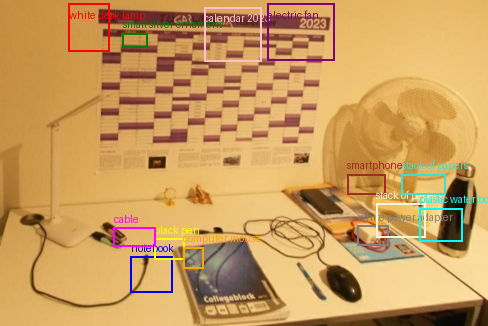

In [21]:
from utils import plot_bboxes


prompt_text = """
    You are analyzing an image of a table with various objects.

    TASK: Locate every object that lies on the table surface, identify what each object is, and output bounding box coordinates with descriptive labels in JSON format.

    COORDINATE SYSTEM:
    - Use NORMALIZED coordinates from 0 to 1
    - Origin (0,0) is TOP-LEFT corner of the image
    - (1,1) is BOTTOM-RIGHT corner
    - x: horizontal position (left to right)
    - y: vertical position (top to bottom)

    OBJECT IDENTIFICATION GUIDELINES:
    1. Be specific and descriptive in naming objects
    2. Use common English names (e.g., "coffee mug" not just "mug")
    3. For technical objects, use accurate terms (e.g., "Phillips screwdriver", "metric wrench")
    4. If uncertain, use general but descriptive terms (e.g., "electronic component", "metal bracket")
    5. Include size/color if it helps distinguish objects (e.g., "small red screw", "large black book")

    BOUNDING BOX PLACEMENT:
    - Define box as [x_min, y_min, x_max, y_max] — top-left to bottom-right corners
    - Cover the entire visible extent of the object on the table
    - For partially visible objects, estimate full bounding box based on visible portion
    - For stacked/overlapping objects, prioritize the most visible one

    OUTPUT REQUIREMENTS:
    1. Return ONLY valid JSON array
    2. Each object must have: {"bbox_2d": [x_min, y_min, x_max, y_max], "label": "descriptive_name"}
    3. All coordinates MUST be between 0 and 1 (normalized)
    4. Include ALL objects on table surface
    5. Do NOT number labels like "object_1" - use descriptive names
    6. For multiple identical objects, add distinguishing features:
       - "blue pen" vs "black pen"
       - "hammer on left" vs "hammer on right"
       - "large notebook" vs "small notebook"

    IMPORTANT RULES:
    - Objects must be physically on the table surface
    - Ignore background objects, wall items, or floating objects
    - Do NOT use pixel coordinates - only normalized 0-1 range
    - If object is partially obscured, estimate its full bounding box
    - DO NOT include wall calendars, figurines, or hanging decorations

    EXAMPLE OUTPUT:
    ```json
    [
        {"bbox_2d": [0.324, 0.567, 0.389, 0.621], "label": "ceramic coffee mug"},
        {"bbox_2d": [0.412, 0.589, 0.478, 0.635], "label": "metal wrench"},
        {"bbox_2d": [0.538, 0.621, 0.592, 0.654], "label": "yellow pencil"},
        {"bbox_2d": [0.712, 0.489, 0.789, 0.542], "label": "smartphone"},
        {"bbox_2d": [0.823, 0.534, 0.912, 0.598], "label": "stack of papers"},
        {"bbox_2d": [0.456, 0.723, 0.521, 0.789], "label": "plastic water bottle"},
        {"bbox_2d": [0.389, 0.678, 0.432, 0.712], "label": "small silver screw"},
        {"bbox_2d": [0.645, 0.712, 0.723, 0.756], "label": "wooden ruler"}
    ]
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
plot_bboxes(image_path, result)

In [22]:
prompt_text = """
    You are an object detection and description assistant.
    
    IMAGE DESCRIPTION:
    - The image shows a table with multiple objects
    - Each object is marked with a visible red dot at its center
    - The red dots are your guide to locate ALL objects

    TASK:
    1. For EVERY red dot on the image, identify the corresponding object
    2. For each object, provide exactly 4 attributes in this format:
       [Object name], [main color], [size: small/medium/large], [position: left/center/right part of the table]

    DETECTION RULES:
    1. **Red dot priority**: Only process objects with red dots. Ignore objects without dots.
    2. **Object identification**: Determine the most specific name for each object (e.g., "screwdriver" not just "tool")
    3. **Color determination**: Identify the dominant/main color of the object
    4. **Size classification**:
       - Small: fits within 5% of image width
       - Medium: 5-15% of image width  
       - Large: >15% of image width
    5. **Position reference**: Use "table" as reference frame:
       - Left: left 1/3 of table area
       - Center: middle 1/3 of table area
       - Right: right 1/3 of table area

    OUTPUT FORMAT:
    - One line per object
    - Exactly: [Name], [Color], [Size], [Position]
    - Example: "Phillips screwdriver, red, medium, left part of the table"
    - List ALL objects in consistent order (e.g., left to right, top to bottom)

    SPECIAL CASES:
    1. **Dense clusters**: If dots are very close, analyze each separately
    2. **Overlapping objects**: Use the red dot position to determine which object
    3. **Uncertain objects**: Use best descriptive name (e.g., "electronic component" if unsure)
    4. **Multiple colors**: Choose the most prominent/visible color

    START DETECTION NOW. Return only the list, no explanations.
"""
image_path = "/home/jupyter/project/experiments/table_pointed.png"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Calendar, purple, large, left part of the table
Desk lamp, white, medium, left part of the table
Glasses, brown, small, left part of the table
Decorative figure, brown, small, left part of the table
Phone, black, small, center part of the table
Charger, white, small, center part of the table
Pen, blue, small, center part of the table
Notebook, blue, medium, center part of the table
Computer mouse, black, small, center part of the table
Fan, black, large, right part of the table
Water bottle, silver, medium, right part of the table